In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=1.25,rc={"lines.linewidth": 2})
sns.set_style("white")

In [23]:
df_pipes = gpd.read_file('../data/processed_data/central/pipes.geojson')
# df_pipes_geo = gpd.read_file('../data/processed_data/EBMUD_pipe_network.json')

# Materials

In [24]:
materials = ['CI','STEEL','AC','PVC','HDPE','DI','OTHERS']
matieral_codes = ['C','S','A','N','H','D']

In [25]:
ac_pipes = df_pipes[df_pipes['material'] == 'A']
ci_pipes = df_pipes[df_pipes['material'] == 'C']
di_pipes = df_pipes[df_pipes['material'] == 'D']
hdpe_pipes = df_pipes[df_pipes['material'] == 'H']
pvc_pipes = df_pipes[df_pipes['material'] == 'N']
steel_pipes = df_pipes[df_pipes['material'] == 'S']

pipe_mateiral_dfs = [ci_pipes,steel_pipes,ac_pipes,pvc_pipes,hdpe_pipes,di_pipes]

In [26]:
len(df_pipes)

66746

In [27]:
tot_length = df_pipes['length'].sum()
length_ratio = []
for df in pipe_mateiral_dfs:
    ratio = df['length'].sum()/tot_length
    length_ratio.append(ratio)
length_ratio.append(1-sum(length_ratio))
length_ratio = np.array(length_ratio)*100

/home/rewu/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/rewu/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


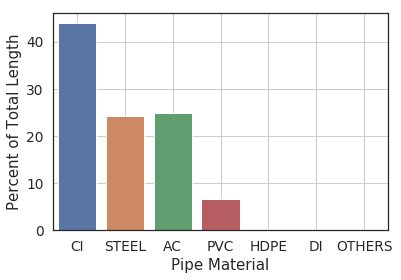

In [28]:
ax = sns.barplot(materials,length_ratio)
ax.set_xlabel('Pipe Material')
ax.set_ylabel('Percent of Total Length')
ax.grid('on')
# ax.figure.savefig('../results/data_exploration/pipe_mateiral.png',bbox_inches='tight',dpi=300)

In [29]:
ages = np.array(df_pipes['age'])
thres = [(0,20),(20,50),(50,1000)]
ratios = []
for low,high in thres:
    df = df_pipes[(low<ages) & (ages<high)]
    ratio = len(df)/len(ages)*100
    ratios.append(ratio)
ratios = [100-sum(ratios)]+ratios

([<matplotlib.patches.Wedge at 0x7f8e9b469710>,
 [Text(1.09202,0.132223,'Unknown'),
  Text(0.956726,0.54284,'0-20 yrs'),
  Text(0.265493,1.06748,'20-50 yrs'),
  Text(-0.656359,-0.882719,'50+ yrs')],
 [Text(0.59565,0.0721214,'3.8%'),
  Text(0.52185,0.296095,'8.8%'),
  Text(0.144815,0.582262,'17.1%'),
  Text(-0.358014,-0.481483,'70.4%')])

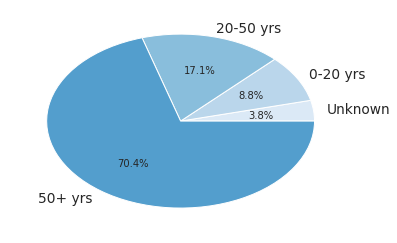

In [30]:
labels = ['Unknown','0-20 yrs', '20-50 yrs', '50+ yrs']
colors = sns.color_palette("Blues")
fig1, ax1 = plt.subplots()
ax1.pie(ratios, labels=labels,autopct='%1.1f%%',colors = colors,
        shadow=False)
# ax1.figure.savefig('../results/data_exploration/pipe_age.png',bbox_inches='tight',dpi=300)

In [31]:
dia = np.array(df_pipes['diameter'])
thres = [(3,8),(8,12),(12,24),(24,36),(36,100)]
ratios = []
for low,high in thres:
    ratio = sum((low<=dia) & (dia<high))/len(dia)*100
    ratios.append(ratio)
# ratios = [100-sum(ratios)]+ratios

/home/rewu/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/rewu/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


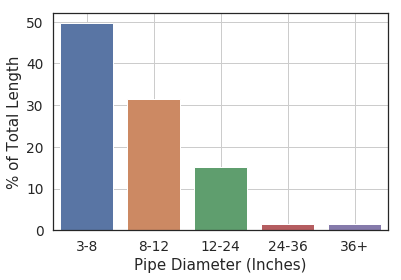

In [32]:
labels = ['3-8','8-12', '12-24', '24-36','36+']
ax = sns.barplot(np.array(labels),np.array(ratios))
ax.set_xlabel('Pipe Diameter (Inches)')
ax.set_ylabel('% of Total Length')
ax.grid('on')
# ax.figure.savefig('../results/data_exploration/diameter_distribution.png',bbox_inches='tight',dpi=300)

In [33]:
ratios

[49.65091541066131,
 31.582416923860606,
 15.15296796811794,
 1.520690378449645,
 1.5311778983010218]

In [34]:
ages = np.array(df_pipes['age'])
thres = [(0,20),(20,50),(50,1000)]
groups_names = ['0-20 yrs','20-50 yrs','50+ yrs']
pipe_perc = []
pipe_age_groups = []
pipe_types = []
for low_high,name in zip(thres,groups_names):
    low,high = low_high
    df = df_pipes[(low<ages) & (ages<high)]
    group_length = df['length'].sum()
    for mcode,mname in zip(matieral_codes,materials[:-1]):
        df_m = df[df['material'] == mcode]
        lratio = df_m['length'].sum()/group_length*100
        pipe_perc.append(lratio)
        pipe_age_groups.append(name)
        pipe_types.append(mname)
    
df_dict = {'Pipe Age':pipe_age_groups,
          'Material': pipe_types,
          'Percent of Length for Each Pipe Material': pipe_perc}

df_age_group = pd.DataFrame.from_dict(df_dict)

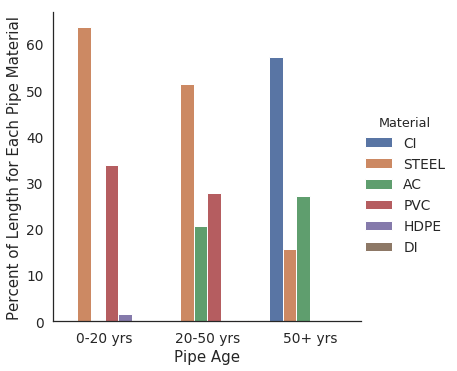

In [35]:
ax = sns.catplot(x='Pipe Age', y='Percent of Length for Each Pipe Material', 
                 hue='Material', kind='bar', data=df_age_group)
# ax.savefig('../results/data_exploration/age_material1.png',bbox_inches='tight',dpi=300)

In [36]:
ages = np.array(df_pipes['age'])
thres = [(0,20),(20,50),(50,1000)]
groups_names = ['0-20 yrs','20-50 yrs','50+ yrs']
pipe_perc = []
pipe_age_groups = []
pipe_types = []
for low_high,name in zip(thres,groups_names):
    low,high = low_high
    df = df_pipes[(low<ages) & (ages<high)]
    for mcode,mname in zip(matieral_codes,materials[:-1]):
        df_m = df[df['material'] == mcode]
        lratio = df_m['length'].sum()/tot_length*100
        pipe_perc.append(lratio)
        pipe_age_groups.append(name)
        pipe_types.append(mname)
    
df_dict = {'Pipe Age':pipe_age_groups,
          'Material': pipe_types,
          'Percent of Total Pipe Length': pipe_perc}

df_age_group2 = pd.DataFrame.from_dict(df_dict)

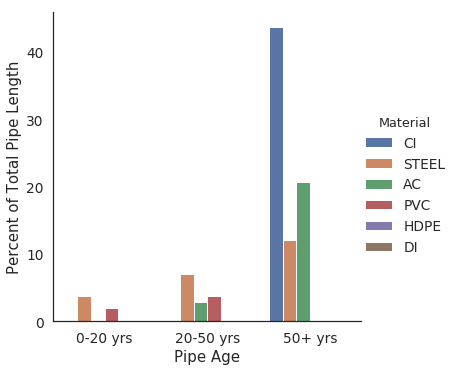

In [37]:
ax = sns.catplot(x='Pipe Age', y='Percent of Total Pipe Length', 
                 hue='Material', kind='bar', data=df_age_group2)
# ax.savefig('../results/data_exploration/age_material2.png',bbox_inches='tight',dpi=300)

In [21]:
# df_pipes_geo['age'] = ages

In [22]:
# df_pipes_geo.to_file('../data/processed_data/ebmud_pipe_age.geojson'3,driver='GeoJSON')